In [6]:
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,make_scorer,classification_report
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit, cross_validate,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# !pip install umap-learn

In [4]:
np.set_printoptions(precision=6, suppress=True)

In [5]:

class FFT:
    def __init__(self,timeSeries,fs=160):
        self.getFFT(timeSeries)

    def getFFT(self, timeSeries,fs=160):
        self.N = len(timeSeries)
        self.T = 1/fs
        self.t = np.arange(0,self.N/fs,self.T)
        f = np.fft.fftfreq(self.N,self.T)
        # self.data,self.f = np.abs(np.fft.fft(timeSeries))[f>0],f[f>0]
        self.data,self.f = np.real(np.fft.fft(timeSeries))[f>0],f[f>0]

    def plotFFT(self):
        plt.figure()
        plt.plot(self.f,(self.data)*(1/self.N))
        plt.show()
        return

    # filtragem da rede (intervalo indicado é de 0.5 até 42.0 hz)
    def bandPassFilter(self,min,max):
        self.data = self.data[(self.f>min) & (self.f<max)]
        self.f = self.f[(self.f>min) & (self.f<max)]

    
def display_results(labels_test,rfc_pred):
    acc = accuracy_score(labels_test, rfc_pred)
    f1 = f1_score(labels_test, rfc_pred, average='macro')
    print(classification_report(labels_test,rfc_pred, digits=4))

    aux_df = labels_test.drop_duplicates().sort_values()
    conf_matrix = confusion_matrix(labels_test, rfc_pred)
    plt.figure(figsize=(12.8,6))
    sns.heatmap(conf_matrix, 
                annot=True,
                xticklabels=aux_df.values, 
                yticklabels=aux_df.values,
                cmap="Blues")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion matrix')
    plt.show()
    return f1,acc

In [6]:

# metrics = []


# subjects_range = range(1, 110)
# files = [4,8,12]
# for subject in subjects_range:
#     if subject in [88, 92, 100]:
#         continue
#     for file in files:
#         fileName = f'../downloaded_files/S{subject:03d}R{file:02d}.edf'
        
#         reader = mne.io.read_raw_edf(fileName,preload=True, verbose=0)
#         annotations = reader.annotations
#         codes = annotations.description
#         codeArray = []     
#         counter = 0
#         df = pd.DataFrame(reader.get_data().T, columns=[channel.replace(".","") for channel in reader.ch_names])
#         df = df[~(df == 0).all(axis=1)]
#         # df = df[160:min(len(df),19680)] # Filter first and last values
#         timeArray = np.array([round(x,5) for x in np.arange(0,len(df)/160,.00625)])
#         # timeArray = np.array([round(x,5) for x in np.arange(0,124.5,.00625)])

#         for timeVal in timeArray:
#             if timeVal in annotations.onset:
#                 counter += 1
#             codeArray.append(codes[counter-1])

#         df["target"] = np.array(codeArray[:len(df)]).T
        

#         df.to_csv(f"../treated_files/S{subject:03d}R{file:02d}.csv")


In [32]:

# metrics = []


# subjects_range = range(1, 110)
# files = [4,8,12]
# for subject in subjects_range:
#     if subject in [88, 92, 100]:
#         continue
#     for file in files:
#         df = pd.read_csv(f"../treated_files/S{subject:03d}R{file:02d}.csv")

#         # Iterate over unique target values
#         window_size = 160
#         shift_size = 80
#         # for target_value in df['target'].unique():
#             # Create a DataFrame for each target value
#             # target_df = df[df['target'] == target_value]
#             # target_df.reset_index(drop=True, inplace=True)
#             # Create a list to store the windowed dataframes
#         target_df = df
#         # Iterate through the dataframe with the specified window and shift size
#         for i in range(0, len(target_df) - window_size + 1, shift_size):
            
#                 # Extract the window of dat'a
#                 window_data = target_df[['Fp1','target']].iloc[i:i + window_size]
#                 if len(window_data) == 160:
#                     # if (window_data['target'][i] != np.max(window_data['target'][-1:]) ):
#                     #     target = "T0"
#                     # else:
#                         # target = window_data['target'][i]

#                     target = window_data['target'][i]
#                     fft = FFT(window_data['Fp1'])
#                     fft.bandPassFilter(0.5,42)
#                     # data = {
#                     #     'mean': [np.mean(fft.data)],
#                     #     'max': [np.max(fft.data)],
#                     #     'min': [np.min(fft.data)],
#                     #     'fmax': [fft.f[np.argmax(fft.data)]],
#                     #     'energy': [sum(np.abs(fft.data)*np.abs(fft.data))/len(fft.data)],
#                     #     'target': target
#                     # }
#                     data = fft.data
#                     df = pd.DataFrame(columns= fft.f , data = data.reshape(1,41))
#                     df['target'] = target
#                     metrics.append(df)



#         # df = df[df['target']!= "T0"]

#         #         # Iterate over unique target values
#         # window_size = 160
#         # shift_size = 80
#         # for target_value in df['target'].unique():
#         #     target_df = df[df['target'] == target_value]
#         #     target_df.reset_index(drop=True, inplace=True)
#         # # target_df = df
#         # # Iterate through the dataframe with the specified window and shift size
#         #     for i in range(0, len(target_df) - window_size + 1, shift_size):
                
#         #             # Extract the window of dat'a
#         #             window_data = target_df[['Fp1','target']].iloc[i:i + window_size]
#         #             if len(window_data) == 160:
#         #                 fft = FFT(window_data['Fp1'])
#         #                 fft.bandPassFilter(0.5,42)
#         #                 data = {
#         #                     'mean': [np.mean(fft.data)],
#         #                     'max': [np.max(fft.data)],
#         #                     'min': [np.min(fft.data)],
#         #                     'fmax': [fft.f[np.argmax(fft.data)]],
#         #                     'energy': [sum(np.abs(fft.data)*np.abs(fft.data))/len(fft.data)],
#         #                     'target': window_data['target'][i]
#         #                 }
#         #                 metrics.append(pd.DataFrame(data))
                    
# metrics = pd.concat(metrics, ignore_index=True)
# metrics.to_csv("./dataframe/t0-t1-t2-fft.csv")

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf
print(__doc__)


Automatically created module for IPython interactive environment


In [15]:
raw = None
metrics = []
tmin, tmax = -1.0, 4.0
subject = 1
subjects_range = range(1, 110)
files = [4,8,12]
for subject in subjects_range:
    if subject in [88, 92, 100]:
        continue
    for file in files:
        fileName = f'../../downloaded_files/S{subject:03d}R{file:02d}.edf'

        if raw is None:
            raw = mne.io.read_raw_edf(fileName,preload=True, verbose=0)
        else:
            new_raw = mne.io.read_raw_edf(fileName,preload=True, verbose=0)
            raw = concatenate_raws([raw, new_raw])
raw.rename_channels({channel:channel.replace(".","") for channel in raw.ch_names})
# Add positions to channels
montage = make_standard_montage("standard_1005")
raw.set_montage(montage)

raw.annotations.rename(dict(T1="left", T2="right"))
events = events_from_annotations(raw)
# Apply band-pass filter
raw.filter(7.0, 42.0, fir_design="firwin", skip_by_annotation="edge")

picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")

# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs = Epochs(
    raw,
    event_id=[2, 3],
    events = events[0],
    tmin=tmin,
    tmax=tmax,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)

df = epochs.to_data_frame()



# #############################################################################
# # Set parameters and read data

# avoid classification of evoked responses by using epochs that start 1s after
# cue onset.




In [34]:
metrics = pd.read_csv("./dataframe/t0-t1-t2-fft.csv",index_col=0)

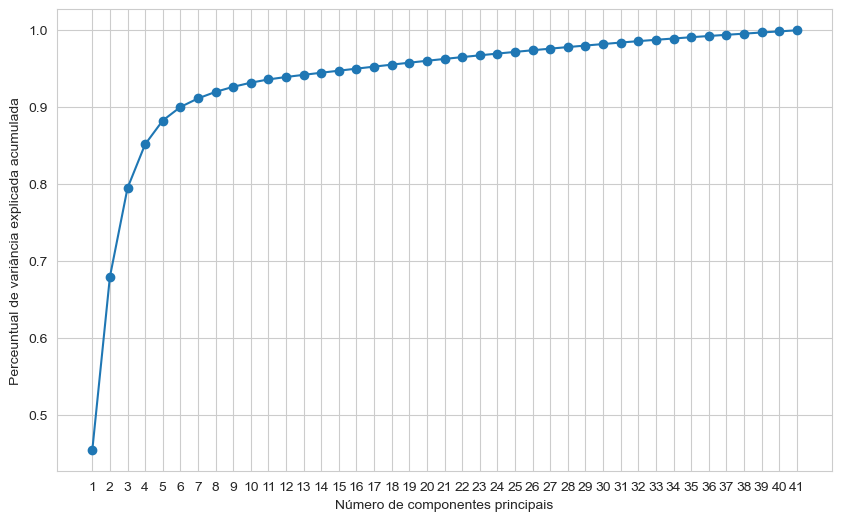

In [9]:
pca = PCA()
pca.fit(metrics.drop(columns='target'))

variancia_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)


fig, ax = plt.subplots(figsize=(10, 6))
eixo_x = list(range(1, len(variancia_explicada_acumulada)+1))
ax.plot(eixo_x, variancia_explicada_acumulada, marker="o")
ax.set_xlabel("Número de componentes principais")
ax.set_ylabel("Perceuntual de variância explicada acumulada")
ax.set_xticks(eixo_x)
plt.show()

In [14]:
pd.DataFrame(variancia_explicada_acumulada)

0
0   0.454091
1   0.679486
2   0.794954
3   0.851845
4   0.882730
5   0.900274
6   0.911487
7   0.919978
8   0.926574
9   0.931920
10  0.936167
11  0.939324
12  0.942136
13  0.944862
14  0.947534
15  0.950181
16  0.952803
17  0.955371
18  0.957923
19  0.960399
20  0.962812
21  0.965182
22  0.967491
23  0.969759
24  0.971943
25  0.974087
26  0.976172
27  0.978222
28  0.980199
29  0.982150
30  0.984090
31  0.985927
32  0.987665
33  0.989360
34  0.991025
35  0.992595
36  0.994157
37  0.995667
38  0.997163
39  0.998610
40  1.000000

In [10]:
embeddings = pca.transform(metrics.drop(columns='target'))

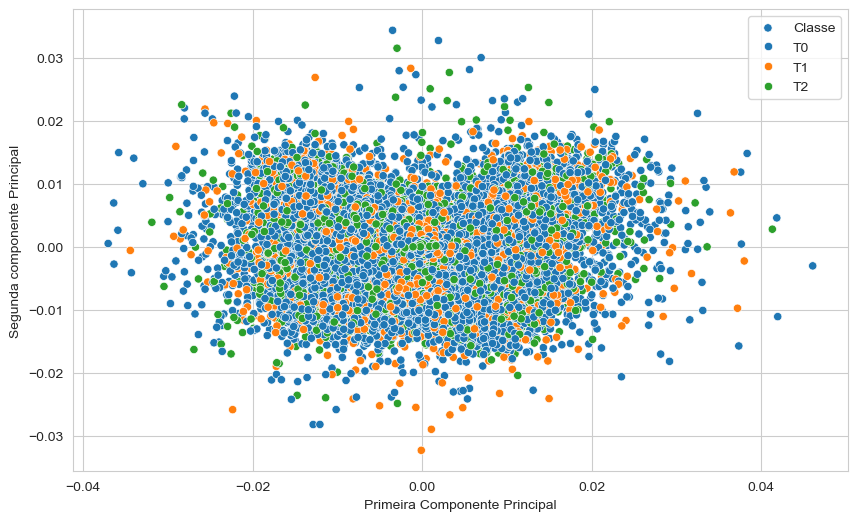

In [11]:
fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(embeddings)[0],y=  pd.DataFrame(embeddings)[1], hue =  metrics['target'],palette="tab10")
ax.set_ylabel("Segunda componente Principal")
ax.set_xlabel("Primeira Componente Principal")
ax.legend(["Classe","T0","T1","T2"])
plt.show()

## umap = UMAP(random_state=42,n_neighbors=30,min_dist=0.05)

In [12]:
umap = UMAP(random_state=42,n_neighbors=30,min_dist=0.05)


In [ ]:

label_encoder = LabelEncoder()
X_train_full, X_val, y_train_full, y_val = train_test_split(metrics.drop(columns='target'), label_encoder.fit_transform(metrics['target']), test_size=0.3, random_state=42)
umap.fit(X_train_full,y_train_full)


c:\Users\Vinícius\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0.05, n_neighbors=30, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [ ]:

umap_embeddings = umap.transform(X_train_full)
umap_embeddings_val = umap.transform(X_val)
umap_embeddings_all = umap.transform(metrics.drop(columns='target'))
umap_embeddings_test = umap.transform(pd.concat([X_train_full,X_val[:100]], ignore_index=True))



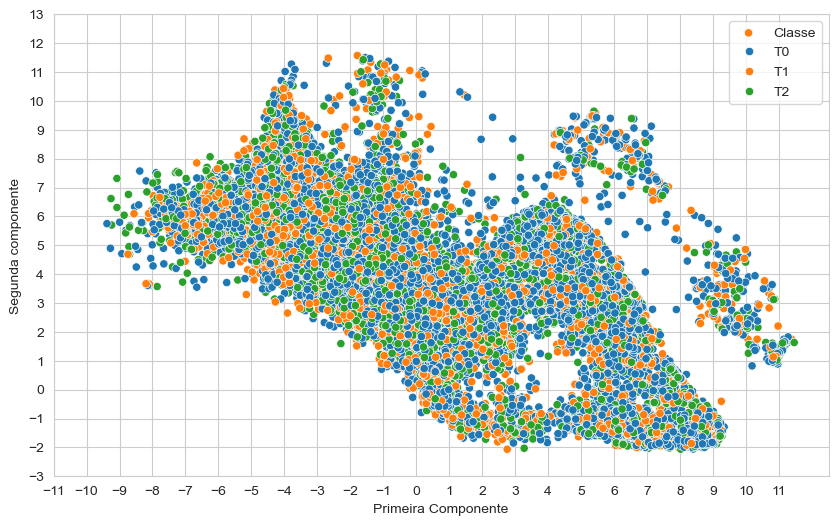

In [ ]:

fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(umap_embeddings_val)[0],y=  pd.DataFrame(umap_embeddings_val)[1], hue =  y_val,palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))
plt.show()

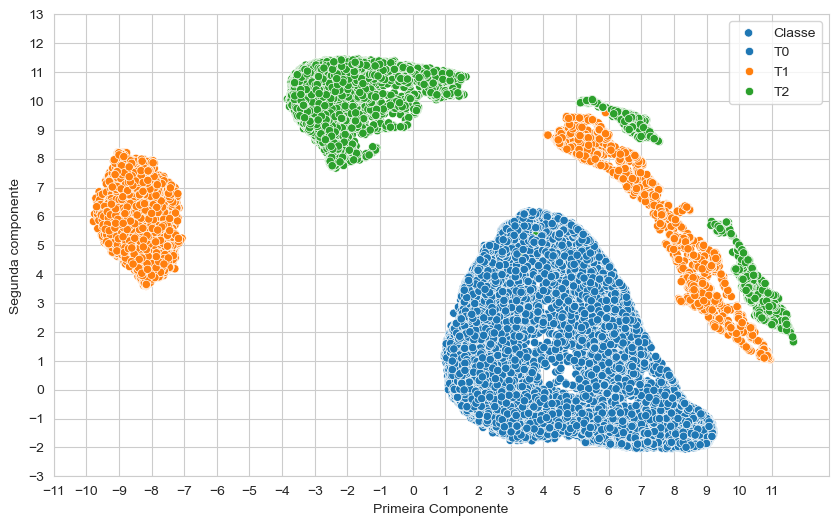

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(umap_embeddings)[0],y=  pd.DataFrame(umap_embeddings)[1], hue =  y_train_full,palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))

plt.show()

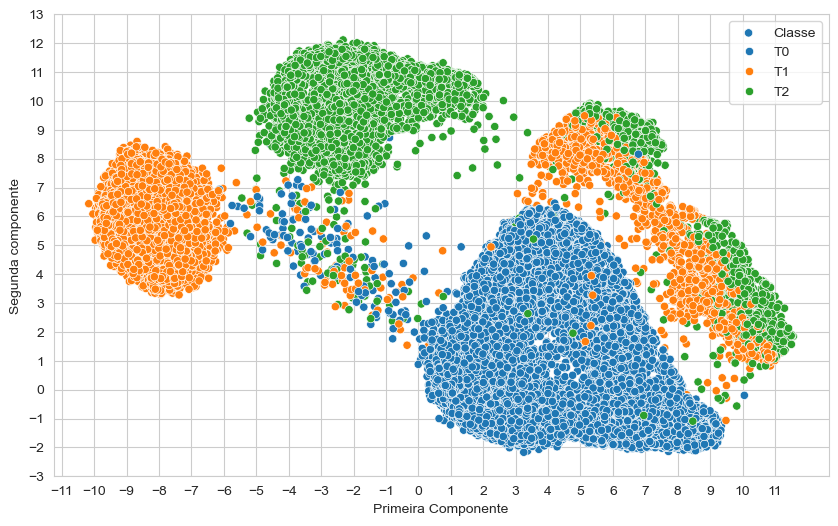

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(umap_embeddings_test)[0],y=  pd.DataFrame(umap_embeddings_test)[1], hue =  pd.concat([pd.DataFrame(y_train_full),pd.DataFrame(y_val)[:100]], ignore_index=True)[0],palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))
plt.show()

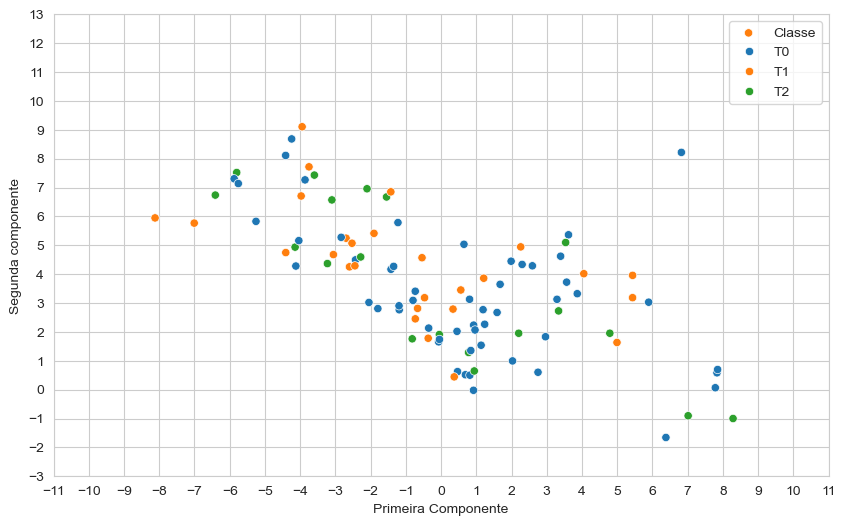

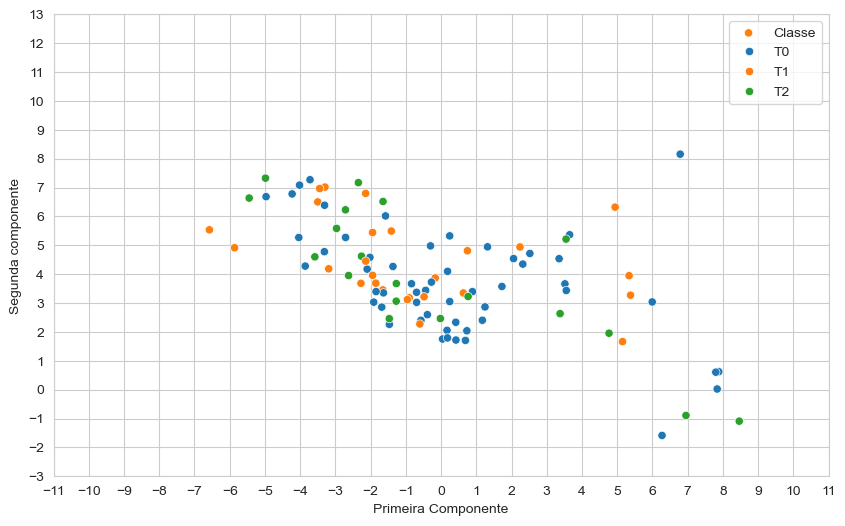

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(umap_embeddings_val)[:100][0],y=  pd.DataFrame(umap_embeddings_val)[:100][1], hue =  y_val[:100],palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))
plt.show()

fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(umap_embeddings_test)[-100:][0],y=  pd.DataFrame(umap_embeddings_test)[-100:][1], hue =  pd.concat([pd.DataFrame(y_train_full),pd.DataFrame(y_val)[:100]], ignore_index=True)[-100:][0],palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))  
plt.show()

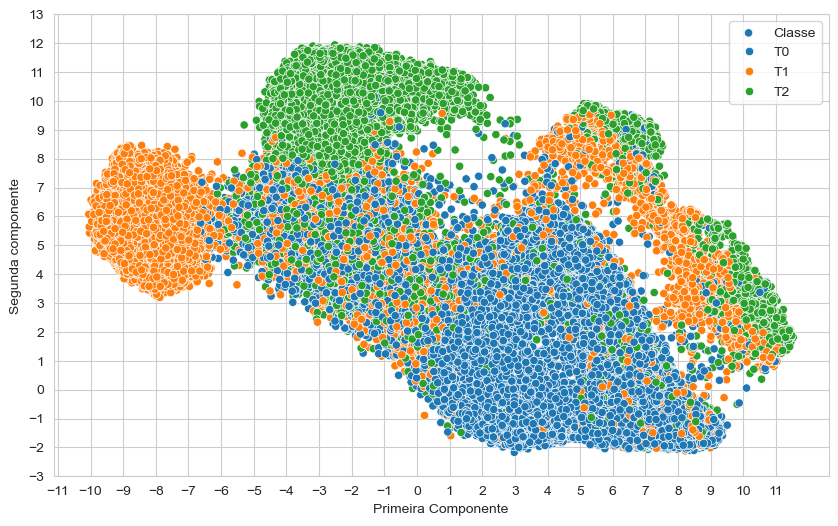

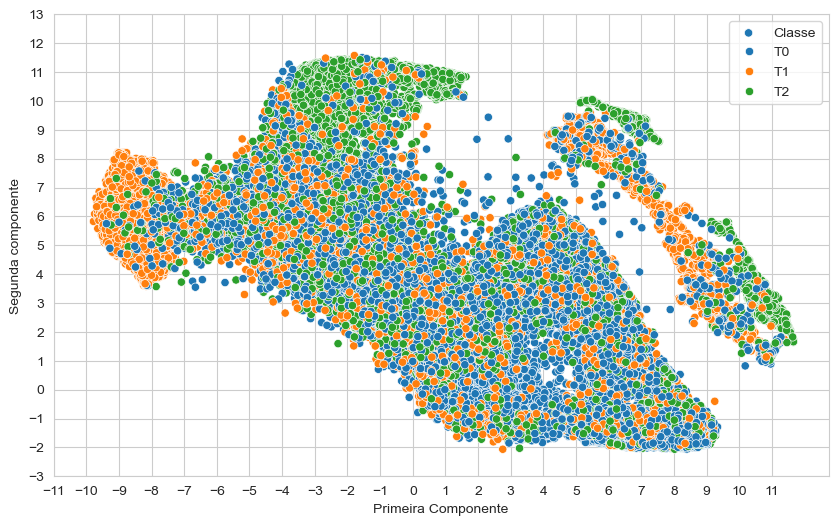

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(umap_embeddings_all)[0],y=  pd.DataFrame(umap_embeddings_all)[1], hue =   label_encoder.transform(metrics['target']),palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))         
plt.show()
fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.concat([pd.DataFrame(umap_embeddings),pd.DataFrame(umap_embeddings_val)], ignore_index=True)[0],y=  pd.concat([pd.DataFrame(umap_embeddings),pd.DataFrame(umap_embeddings_val)], ignore_index=True)[1], hue =   pd.concat([pd.DataFrame(y_train_full),pd.DataFrame(y_val)], ignore_index=True)[0],palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))
plt.show()

## UMAP(random_state=42,n_neighbors=20,min_dist=0.05)

In [144]:
umap = UMAP(random_state=42,n_neighbors=20,min_dist=0.05)

In [145]:
label_encoder = LabelEncoder()
X_train_full, X_val, y_train_full, y_val = train_test_split(metrics.drop(columns='target'), label_encoder.fit_transform(metrics['target']), test_size=0.3, random_state=42)
umap.fit(X_train_full,y_train_full)


c:\Users\Vinícius\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0.05, n_neighbors=20, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [146]:

umap_embeddings = umap.transform(X_train_full)
umap_embeddings_val = umap.transform(X_val)
umap_embeddings_all = umap.transform(metrics.drop(columns='target'))
umap_embeddings_test = umap.transform(pd.concat([X_train_full,X_val[:100]], ignore_index=True))



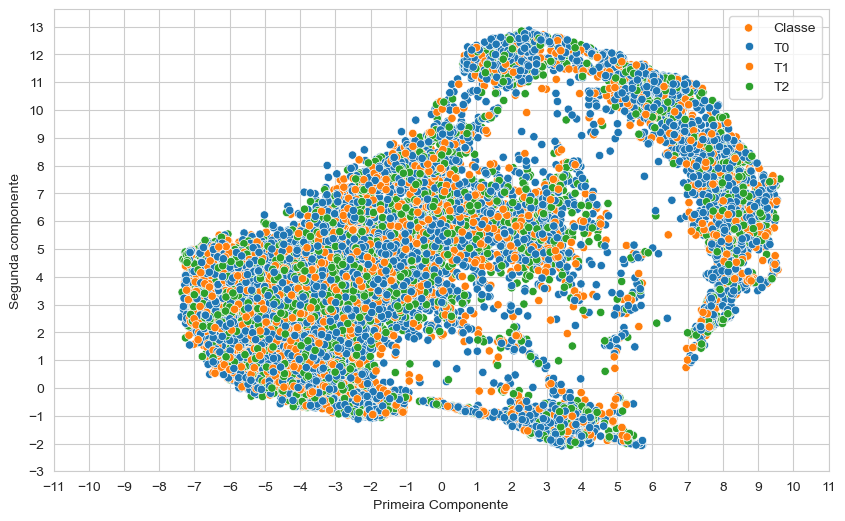

In [147]:

fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(umap_embeddings_val)[0],y=  pd.DataFrame(umap_embeddings_val)[1], hue =  y_val,palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))
plt.show()

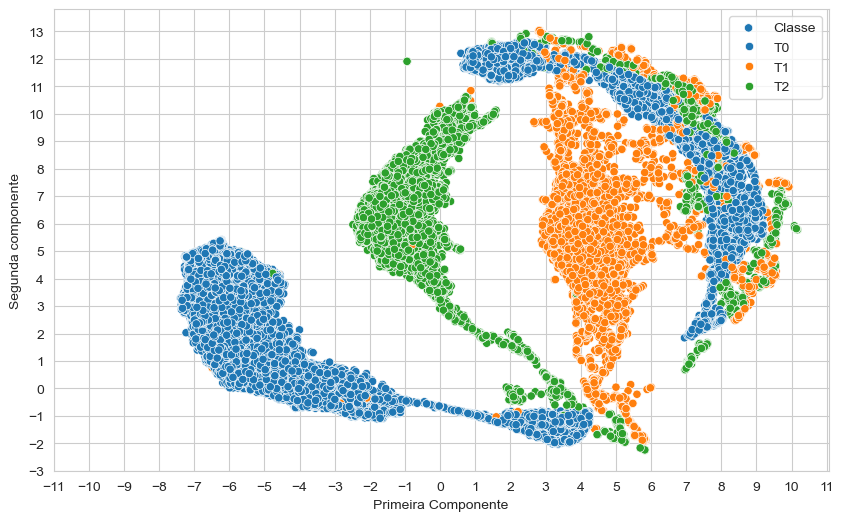

In [148]:
fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(umap_embeddings)[0],y=  pd.DataFrame(umap_embeddings)[1], hue =  y_train_full,palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))

plt.show()

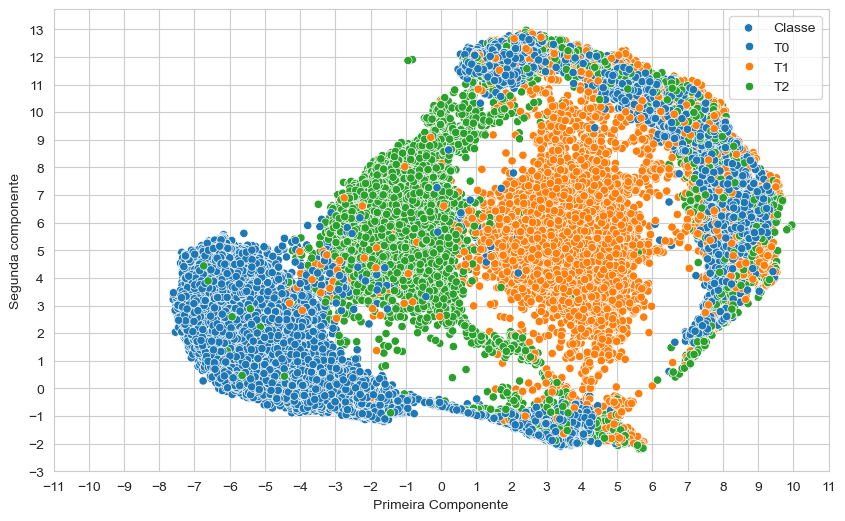

In [149]:
fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(umap_embeddings_test)[0],y=  pd.DataFrame(umap_embeddings_test)[1], hue =  pd.concat([pd.DataFrame(y_train_full),pd.DataFrame(y_val)[:100]], ignore_index=True)[0],palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))
plt.show()

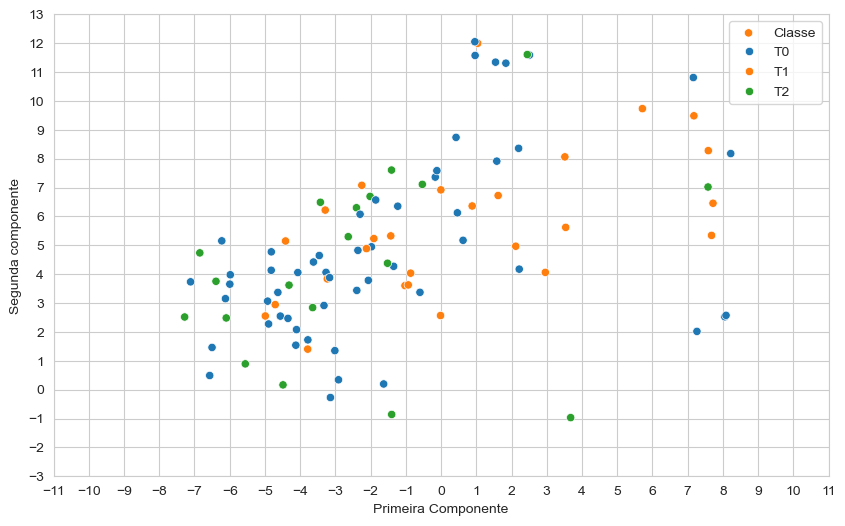

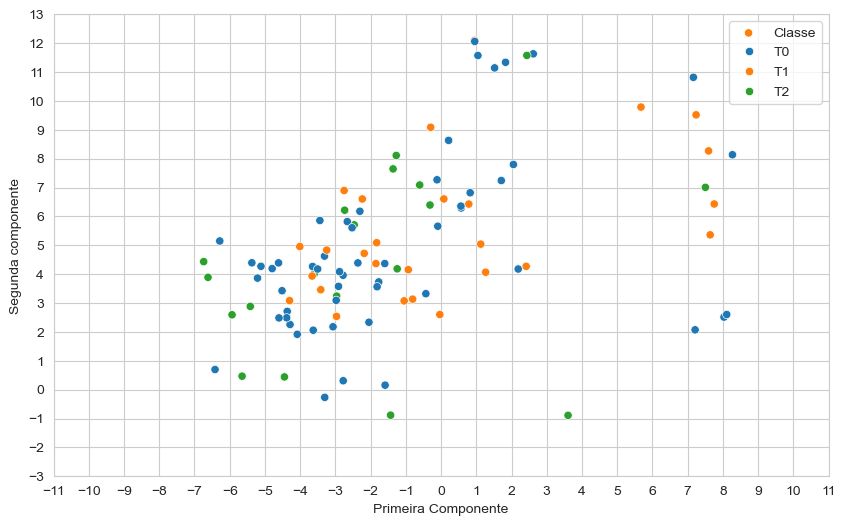

In [150]:
fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(umap_embeddings_val)[:100][0],y=  pd.DataFrame(umap_embeddings_val)[:100][1], hue =  y_val[:100],palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))
plt.show()

fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(umap_embeddings_test)[-100:][0],y=  pd.DataFrame(umap_embeddings_test)[-100:][1], hue =  pd.concat([pd.DataFrame(y_train_full),pd.DataFrame(y_val)[:100]], ignore_index=True)[-100:][0],palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))  
plt.show()

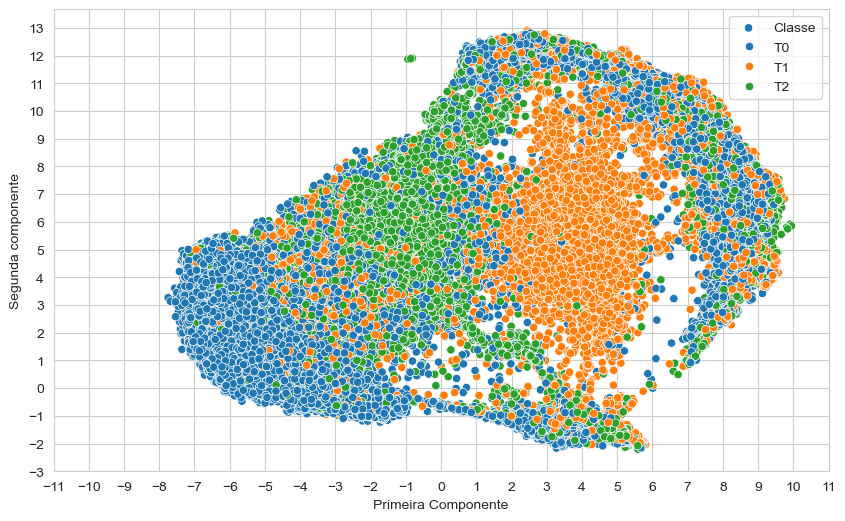

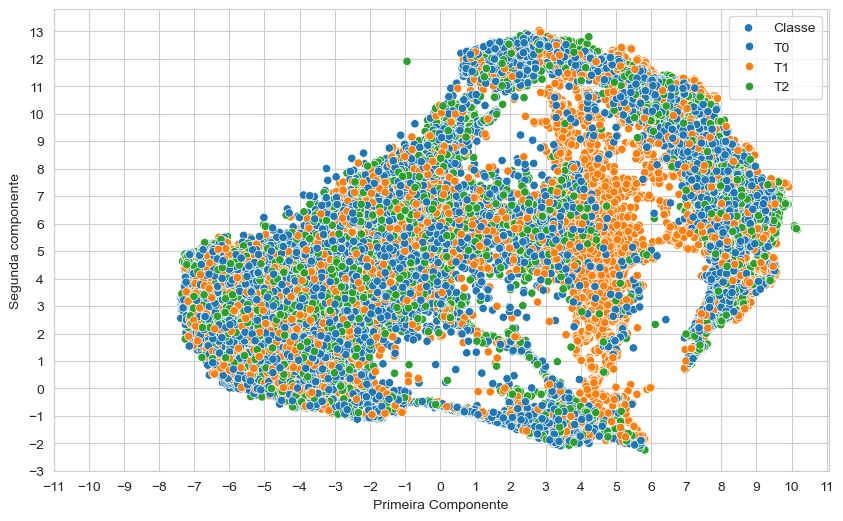

In [151]:
fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.DataFrame(umap_embeddings_all)[0],y=  pd.DataFrame(umap_embeddings_all)[1], hue =   label_encoder.transform(metrics['target']),palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))         
plt.show()
fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x = pd.concat([pd.DataFrame(umap_embeddings),pd.DataFrame(umap_embeddings_val)], ignore_index=True)[0],y=  pd.concat([pd.DataFrame(umap_embeddings),pd.DataFrame(umap_embeddings_val)], ignore_index=True)[1], hue =   pd.concat([pd.DataFrame(y_train_full),pd.DataFrame(y_val)], ignore_index=True)[0],palette="tab10")
ax.set_ylabel("Segunda componente")
ax.set_xlabel("Primeira Componente")
ax.legend(["Classe","T0","T1","T2"])
ax.set_xticks(list(range(-11, 11+1))) 
ax.set_yticks(list(range(-3, 13+1)))
plt.show()

## Conclusão do UMAP

É interessante que o transforme de todos os dados juntos é diferente da união das transformadas do treino e teste. Isso indica que o processo de transform do UMAP leva em consideração todos os pontos, ao invés de apenas classificar um a um. 

Apesar de estranho, não da pra afirmar que há uma melhora real em qualquer um dos dois processos descritos acima, como podemos ver no exemplo de teste, em que claramente os novos pontos se distribuiram de forma pouco relevante quando comparados aos dados de treino anteriormente vistos pelo modelo. Isso pode indicar que o prórpio modelo está em overfit, já que os dados de treino tem uma classificação melhor que os dados não vistos anteriormente pelo modelo. 

A princípio, comparando lado a lado os dois experimentos acima, o conjunto de validação que foi mostrado junto com o conjunto de treino possui uma distribuição mais agrupada. Apesar disso, como normalmente essa amostragem deve ser feita de forma separada, iremos seguir o procedimento tradicional.

Essa visualização preliminar é apenas para demonstrar as capacidades do UMAP. No modelo final iremos utilizar o mesmo número de componentes que o PCA.

In [35]:
metricsT2 = metrics.copy()
metricsT1 = metrics.copy()
# metricsT2 = metrics[metrics['target']!= "T0"].copy()
# metricsT1 = metrics[metrics['target']!= "T0"].copy()

In [36]:
metricsT2.loc[metricsT2['target'] != 'T2', 'target'] = 0
metricsT2.loc[metricsT2['target'] == 'T2', 'target'] = 1

metricsT1.loc[metricsT1['target'] != 'T1', 'target'] = 0
metricsT1.loc[metricsT1['target'] == 'T1', 'target'] = 1


In [37]:
df = metricsT2.copy()

In [38]:
len(metrics)

78072

In [39]:
len(metricsT2)

78072

In [40]:
len(metricsT1)

78072

In [41]:

# Supondo que você tenha os dados X e y para treinamento
label_encoder = LabelEncoder()
X_train, X_val, y_train, y_val = train_test_split(df.drop(columns='target'), label_encoder.fit_transform(df['target']), test_size=0.3, random_state=42)




In [42]:
len(X_val)

23422

In [43]:

# Definir o número de folds para a validação cruzada


model = MLPClassifier(learning_rate_init= 0.3,max_iter= 500,momentum= 0.2,hidden_layer_sizes= (6, 3))

random_grid = {
               'activation': ['logistic'],
               'solver': ['sgd'],
               
               
               }


random_search = RandomizedSearchCV(estimator= model,param_distributions=random_grid,refit='Accuracy',scoring={'F1': 'f1_macro', 'Accuracy': make_scorer(accuracy_score)})
# Criar o modelo da rede neural


In [45]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

In [46]:
# skf = StratifiedKFold(n_splits=n_folds, shuffle=False, random_state=42)
# Iterar sobre os folds
# for train_index, test_index in skf.split(X_train_full, y_train_full):

random_search.fit(X_train_pca, y_train)



c:\Users\Vinícius\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(6, 3),
                                           learning_rate_init=0.3, max_iter=500,
                                           momentum=0.2),
                   param_distributions={'activation': ['logistic'],
                                        'solver': ['sgd']},
                   refit='Accuracy',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'F1': 'f1_macro'})

In [47]:
results = random_search.cv_results_

best_svm = random_search.best_estimator_ 
best_scorer_index = np.nonzero(results['rank_test_Accuracy'] == 1)[0][0]
best_scorer_index


0

c:\Users\Vinícius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Vinícius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Vinícius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.7521    1.0000    0.8585     17615
           1     0.0000    0.0000    0.0000      5807

    accuracy                         0.7521     23422
   macro avg     0.3760    0.5000    0.4292     23422
weighted avg     0.5656    0.7521    0.6456     23422



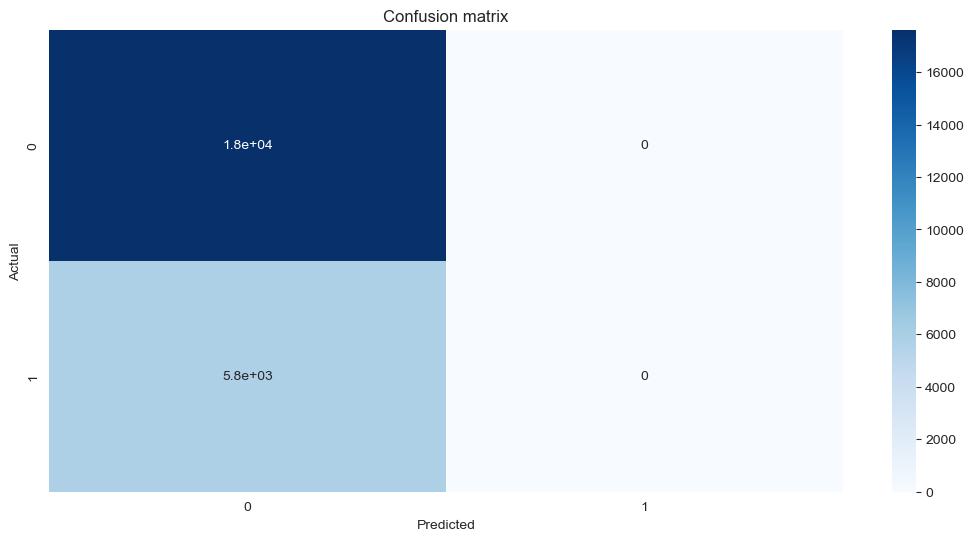

In [48]:

best_svm.fit(X_train_pca, y_train)
svm_pred = best_svm.predict(X_val_pca)

f1,acc = display_results(pd.DataFrame(y_val)[0],pd.DataFrame(svm_pred)[0])

In [28]:
model = Sequential()
model.add(Dense(15, input_dim=15, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='softmax'))
optimizer = SGD(learning_rate=0.3, momentum=0.2)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])



In [49]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(30, activation='relu'))
# model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
# model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='softmax'))
optimizer = SGD(
    learning_rate=0.01
                # , momentum=0.2
                )
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [50]:
model.fit(X_train_pca
          , y_train
          ,validation_data=(X_val_pca,y_val)
        ,epochs=100
          )

Epoch 1/100
1708/1708 [==============================] - 3s 2ms/step - loss: 0.5622 - accuracy: 0.2453 - val_loss: 0.5601 - val_accuracy: 0.2479
Epoch 2/100
1708/1708 [==============================] - 3s 2ms/step - loss: 0.5571 - accuracy: 0.2453 - val_loss: 0.5601 - val_accuracy: 0.2479
Epoch 3/100
1708/1708 [==============================] - 3s 2ms/step - loss: 0.5572 - accuracy: 0.2453 - val_loss: 0.5600 - val_accuracy: 0.2479
Epoch 4/100
1708/1708 [==============================] - 3s 2ms/step - loss: 0.5572 - accuracy: 0.2453 - val_loss: 0.5602 - val_accuracy: 0.2479
Epoch 5/100
1708/1708 [==============================] - 2s 1ms/step - loss: 0.5572 - accuracy: 0.2453 - val_loss: 0.5600 - val_accuracy: 0.2479
Epoch 6/100
1708/1708 [==============================] - 3s 1ms/step - loss: 0.5572 - accuracy: 0.2453 - val_loss: 0.5601 - val_accuracy: 0.2479
Epoch 7/100
1708/1708 [==============================] - 3s 1ms/step - loss: 0.5572 - accuracy: 0.2453 - val_loss: 0.5601 - val_ac

In [51]:

model_pred = model.predict(X_val_pca)
model_pred

732/732 [==============================] - 1s 802us/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

c:\Users\Vinícius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Vinícius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Vinícius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     17615
           1     0.2479    1.0000    0.3973      5807

    accuracy                         0.2479     23422
   macro avg     0.1240    0.5000    0.1987     23422
weighted avg     0.0615    0.2479    0.0985     23422



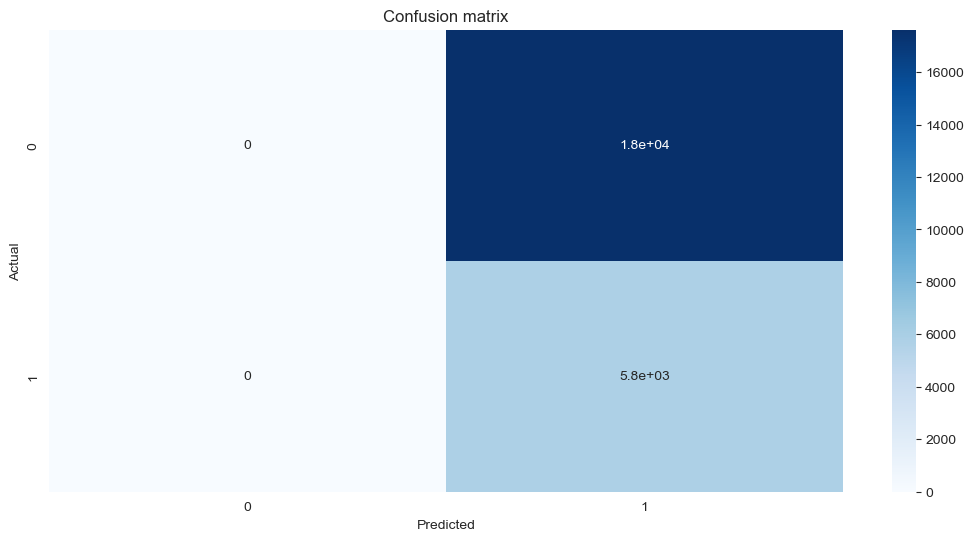

In [52]:
f1,acc = display_results(pd.DataFrame(y_val)[0],pd.DataFrame(model_pred)[0])

In [53]:
umap = UMAP(n_components=6, random_state=42,n_neighbors=30,min_dist=0.05)
umap.fit(X_train,y_train)


X_train_umap = umap.transform(X_train)
X_val_umap = umap.transform(X_val)


c:\Users\Vinícius\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [63]:
# skf = StratifiedKFold(n_splits=n_folds, shuffle=False, random_state=42)
# Iterar sobre os folds
# for train_index, test_index in skf.split(X_train_full, y_train_full):

# Definir o número de folds para a validação cruzada


model = MLPClassifier(learning_rate_init= 0.3,max_iter= 500,momentum= 0.2,hidden_layer_sizes= (6, 4))

random_grid = {
               'activation': ['relu','logistic','tanh'],
               'solver': ['sgd','adam','lbfgs'],
               
               
               }


random_search = RandomizedSearchCV(estimator= model,param_distributions=random_grid,refit='Accuracy',scoring={'F1': 'f1_macro', 'Accuracy': make_scorer(accuracy_score)})
# Criar o modelo da rede neural

random_search.fit(X_train_umap, y_train)



c:\Users\Vinícius\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(6, 4),
                                           learning_rate_init=0.3, max_iter=500,
                                           momentum=0.2),
                   param_distributions={'activation': ['relu', 'logistic',
                                                       'tanh'],
                                        'solver': ['sgd', 'adam', 'lbfgs']},
                   refit='Accuracy',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'F1': 'f1_macro'})

In [ ]:
results = random_search.cv_results_

best_svm = random_search.best_estimator_ 
best_scorer_index = np.nonzero(results['rank_test_Accuracy'] == 1)[0][0]
best_svm.get_params()



              precision    recall  f1-score   support

           0     0.7522    0.9972    0.8575     17615
           1     0.2958    0.0036    0.0071      5807

    accuracy                         0.7508     23422
   macro avg     0.5240    0.5004    0.4323     23422
weighted avg     0.6391    0.7508    0.6467     23422



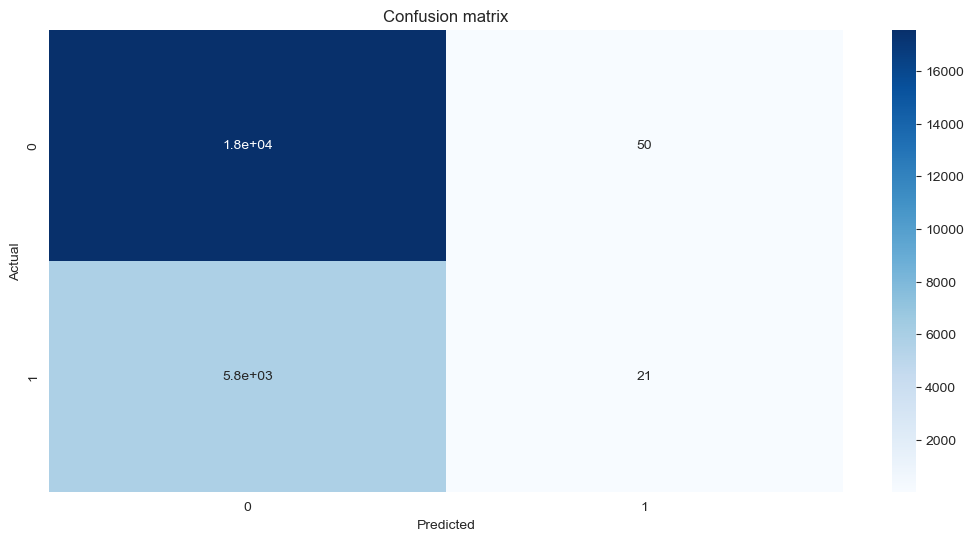

In [65]:
best_svm.fit(X_train_umap, y_train)
svm_pred_umap = best_svm.predict(X_val_umap)

f1,acc = display_results(pd.DataFrame(y_val)[0],pd.DataFrame(svm_pred_umap)[0])

In [ ]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(30, activation='relu'))
# model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
# model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='softmax'))
optimizer = SGD(
    learning_rate=0.01
                # , momentum=0.2
                )
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train_umap, y_train
          ,validation_data=(X_val_umap,y_val)
        ,epochs=100
          )